# 1. Описание задачи: 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Необходимо создать модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

##### В датасете представлены следующие данные:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

# 2. Первичный отсмотр данных

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [262]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 3.Первичный анализ данных в столбцах

### Посмотрим на распределение признака для числовых переменных, устраним выбросы.

Числовых переменных в представленом датасете три, это age(возраст), absences (количество пропущенных занятий) и score(баллы по госэкзамену по математике)

Остальные столбцы содержат категориальные переменные(может принимать только ограниченное и обычно фиксированное количество возможных значений), хоть и выражены в числовой форме.

Разберем каждую числовую переменную по отдельности:

#### 3.1 age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Количество пустых значений по столбцу age:  0


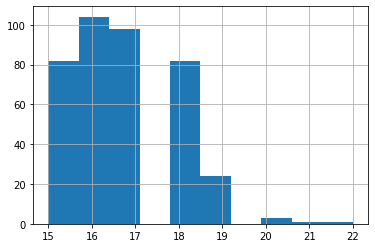

In [263]:
stud_math.age.hist()
print(stud_math.age.describe())
print("Количество пустых значений по столбцу age: ",
      stud_math[pd.isnull(stud_math.age) == True].age.count())

Возраст согласно описанию распределен в диапазоне от 15 до 22 лет, что совпадает с значениями в датасете. Выбросов нет. Пустых значений нет.

#### 3.2 absences

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
Количество пустых значений по столбцу absences:  12


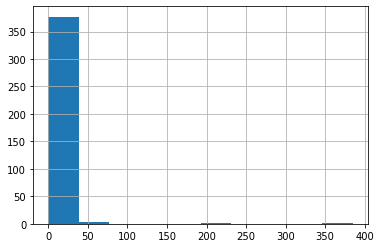

In [264]:
stud_math.absences.hist()
print(stud_math.absences.describe())
print("Количество пустых значений по столбцу absences: ",
      len(stud_math[pd.isnull(stud_math.absences) == True]))

Видим, что основное распределение лежит между 0 и 30 и есть потенциальные выбросы. Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния (межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок percentile(25) -1.5IQR : percentile(75)+1.5IQR, где IQR = percentile(75) - percentile(25).

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


Text(0, 0.5, 'количество учеников')

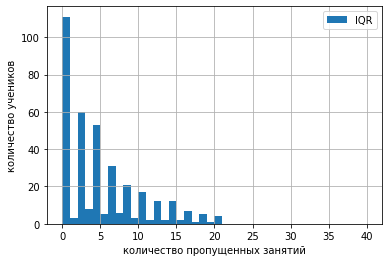

In [265]:
median = stud_math.absences.median()
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud_math.absences.loc[stud_math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=40, range=(0, 40),
                                                                                            label='IQR')
plt.legend()
plt.xlabel('количество пропущенных занятий')
plt.ylabel('количество учеников')

Однако такой способ отбора выбросов работает не всегда. Когда мы знаем потенциальные характеристики распределения, лучше отобрать их, пользуясь здравым смыслом. В данном случае количество пропущеных занятий не может быть больше, чем количество дней в году, 385 -явный выброс. Но все же мы упускаем значения в 40,54,56.. пропущенных занятий, которые вполне могли иметь место быть из-за, например, болезни ученика. Верхнюю границу выбросов оставим равной perc75 + 6*IQR. Отфильтруем значения в датасете

In [266]:
stud_math = stud_math.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 6*IQR)]

#### 3.3 score

count    375.000000
mean      51.986667
std       22.824893
min        0.000000
25%       40.000000
50%       55.000000
75%       67.500000
max      100.000000
Name: score, dtype: float64
Количество пустых значений по столбцу score:  5


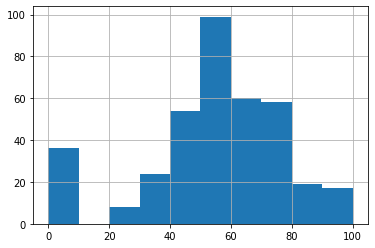

In [267]:
stud_math.score.hist()
print(stud_math.score.describe())
print("Количество пустых значений по столбцу score: ",
      len(stud_math[pd.isnull(stud_math.score) == True]))

 Судя по всему баллы по госэкзамену по математике распределены в интервале от 1 до 100. Выбросов нет. Уберем пустые значения:

In [268]:
stud_math = stud_math.loc[pd.isnull(stud_math.score) == False]
print("Количество пустых значений по столбцу score: ",
      len(stud_math[pd.isnull(stud_math.score) == True]))

Количество пустых значений по столбцу score:  0


### Проанализируем значения номинативных переменных.

Проверим, сколько в нашем датасете пустых значений в каждом поле, есть ли значения, которые не входят в диапазон, указанный в описании к задаче, и можно ли заполнить недостающие данные

In [269]:
list_nom = stud_math[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                      'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                      'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                      'higher', 'internet', 'romantic', 'famrel',
                      'freetime', 'goout', 'health']]
pd.isnull(list_nom).sum().sort_values(ascending=False)

Pstatus       43
paid          38
famsup        36
Fjob          35
internet      33
romantic      31
guardian      30
traveltime    28
famrel        26
Fedu          24
famsize       24
failures      22
higher        19
Mjob          18
reason        17
health        15
nursery       15
activities    14
address       14
freetime       9
schoolsup      9
goout          7
studytime      5
Medu           3
sex            0
school         0
dtype: int64

Практически все поля имеют пустые значения, кроме sex и school. Посмотрим, есть ли значения, которые не входят в диапазон, указанный в описании к задаче. Выведем все уникальные значения по каждому полю, предварительно заменив пустые на None:

In [270]:
for i in list_nom:
    stud_math[i].apply(lambda x: None if x == '' else x)
    display(pd.DataFrame(stud_math[i].value_counts(
        dropna=False).sort_values(ascending=False)))

,school
GP,332
MS,43


,sex
F,199
M,176


,address
U,282
R,79
NaN,14


,famsize
GT3,250
LE3,101
NaN,24


,Pstatus
T,298
NaN,43
A,34


,Medu
4.0,128
2.0,95
3.0,93
1.0,53
NaN,3
0.0,3


,Fedu
2.0,101
3.0,91
4.0,83
1.0,73
NaN,24
0.0,2
40.0,1


,Mjob
other,123
services,93
at_home,56
teacher,53
health,32
NaN,18


,Fjob
other,189
services,95
NaN,35
teacher,26
at_home,16
health,14


,reason
course,128
home,100
reputation,98
other,32
NaN,17


,guardian
mother,237
father,84
NaN,30
other,24


,traveltime
1.0,228
2.0,91
NaN,28
3.0,21
4.0,7


,studytime
2.0,182
1.0,100
3.0,61
4.0,27
NaN,5


,failures
0.0,279
1.0,47
NaN,22
2.0,14
3.0,13


,schoolsup
no,319
yes,47
NaN,9


,famsup
yes,210
no,129
NaN,36


,paid
no,190
yes,147
NaN,38


,activities
yes,187
no,174
NaN,14


,nursery
yes,287
no,73
NaN,15


,higher
yes,340
NaN,19
no,16


,internet
yes,288
no,54
NaN,33


,romantic
no,225
yes,119
NaN,31


,famrel
4.0,171
5.0,95
3.0,60
NaN,26
2.0,15
1.0,7
-1.0,1


,freetime
3.0,147
4.0,106
2.0,61
5.0,35
1.0,17
NaN,9


,goout
3.0,122
2.0,99
4.0,78
5.0,48
1.0,21
NaN,7


,health
5.0,133
3.0,85
4.0,56
1.0,44
2.0,42
NaN,15


По полю Fedu — мы наблюдаем нетипичное значение 40.0, при возможных 0,1,2,3,4. Скорее всего это опечатка. Заменим это значение на 4:

In [271]:
stud_math.loc[stud_math.Fedu == 40.0, "Fedu"] = 4.0
display(pd.DataFrame(stud_math.Fedu.value_counts(dropna=False)))

,Fedu
2.0,101
3.0,91
4.0,84
1.0,73
NaN,24
0.0,2


Также нетипичное значение мы видим в поле famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо). Есть значение -1, скорее всего это тоже опечатка. Заменим его на 1:

In [272]:
stud_math.loc[stud_math.famrel == -1.0, "famrel"] = 1.0
display(pd.DataFrame(stud_math.famrel.value_counts(dropna=False)))

,famrel
4.0,171
5.0,95
3.0,60
NaN,26
2.0,15
1.0,8


В остальном все значения входят в диапазон, указанный в описании к задаче. Пустые значения заменять не будем.
Также у нас есть столбец, который присутствует в данных, но не указан в описании к задаче. Это studytime, granular. 

In [273]:
display(pd.DataFrame(
    stud_math["studytime, granular"].value_counts(dropna=False)))

,"studytime, granular"
-6.0,182
-3.0,100
-9.0,61
-12.0,27
NaN,5


Проверим, коррелируется ли это значение с другими в датасете:

In [274]:
corr = pd.DataFrame(stud_math.corr().abs().unstack(
).sort_values(kind="quicksort")).reset_index()
corr[(corr.level_0 == "studytime, granular")]

,level_0,level_1,0
2,"studytime, granular",Fedu,0.000669
9,"studytime, granular",age,0.004870
32,"studytime, granular",famrel,0.033209
51,"studytime, granular",goout,0.050059
71,"studytime, granular",Medu,0.068600
74,"studytime, granular",absences,0.072106
89,"studytime, granular",health,0.082989
105,"studytime, granular",score,0.108729
111,"studytime, granular",traveltime,0.110440
119,"studytime, granular",freetime,0.129544


Значение столбца studytime, granular полностью коррелируется со столбцом studytime, поэтому исключим его из анализа

In [281]:
del stud_math['studytime, granular']

# 4.Корреляционный анализ

Выясним, какие столбцы коррелируют с баллами по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

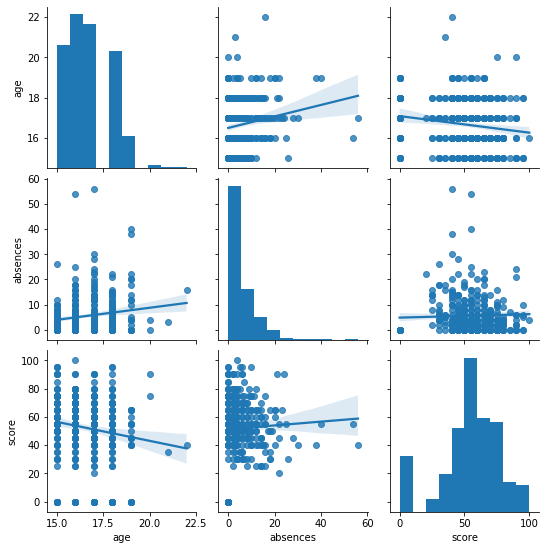

In [306]:
sns.pairplot(stud_math[['age', 'absences', 'score']], kind='reg')

Используем для наглядности матрицу корреляций:

In [307]:
stud_math[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.164926,-0.148726
absences,0.164926,1.000000,0.043051
score,-0.148726,0.043051,1.000000


Обе переменные слабо скоррелирован с рейтингом. 

Положительная корреляция параметра age и absences говорить том, что с возрастом ученики все чаще пропускают занятия. 

# 5.Анализ номинативных переменных

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения оценок в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые необходимо рассмотреть: 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health'. Они сохранены в списке list_nom

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

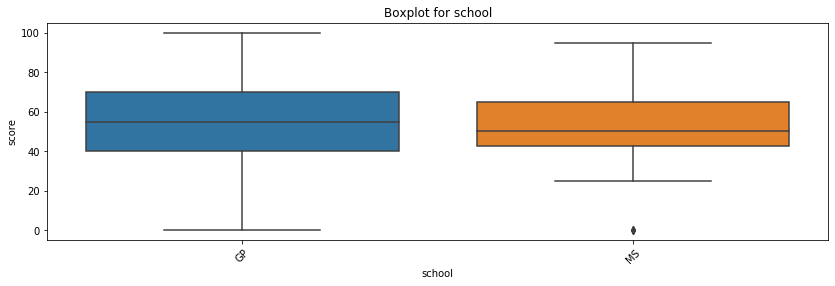

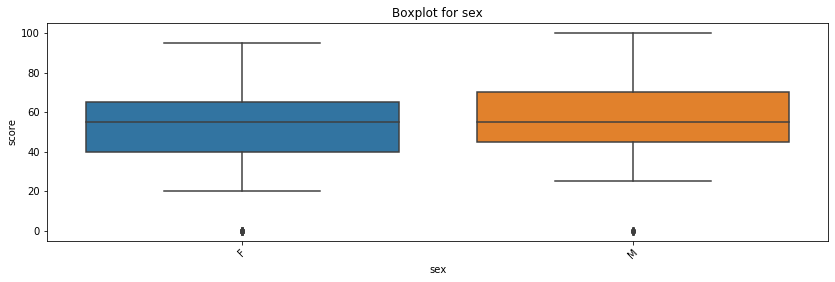

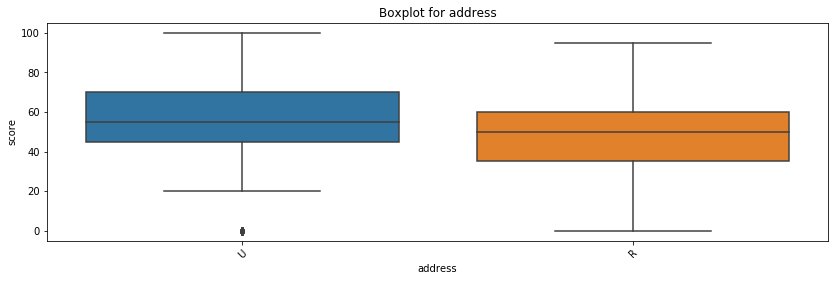

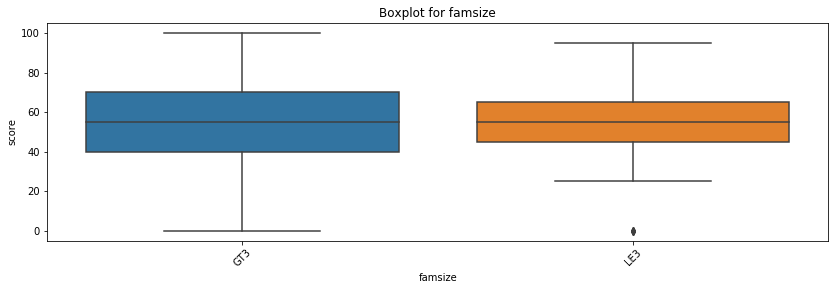

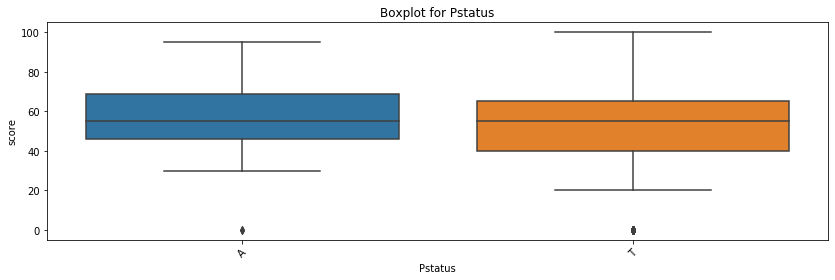

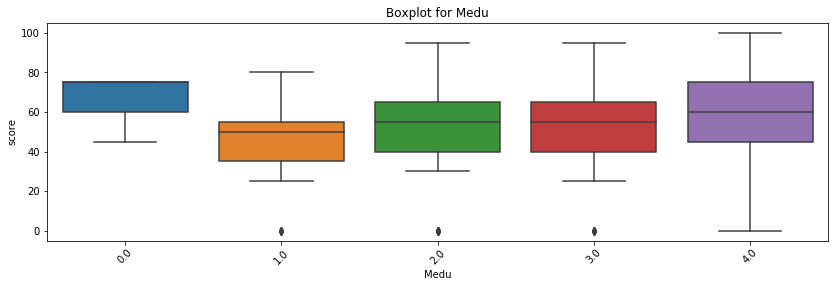

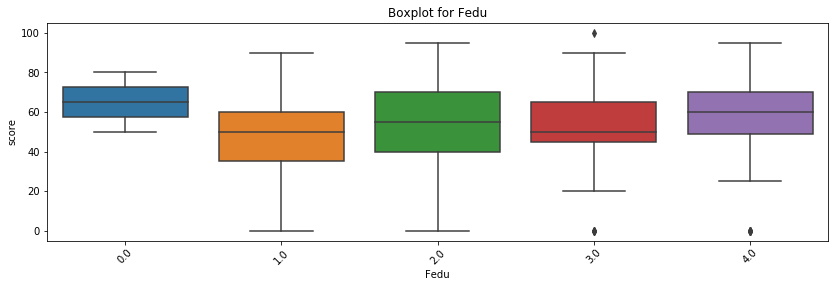

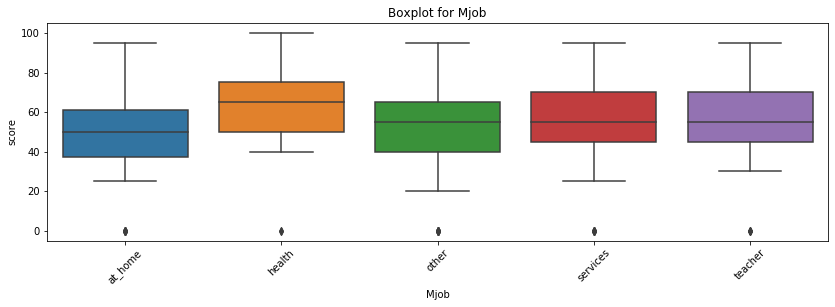

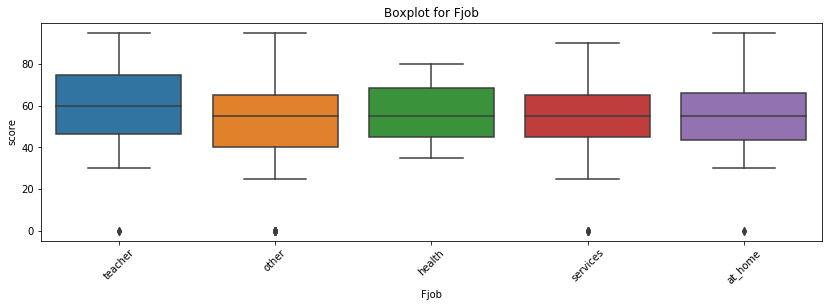

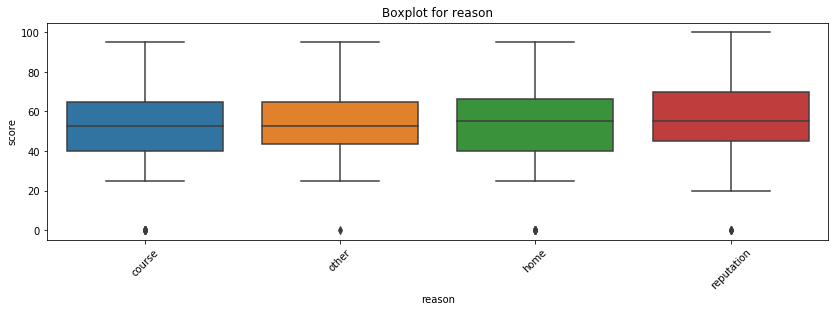

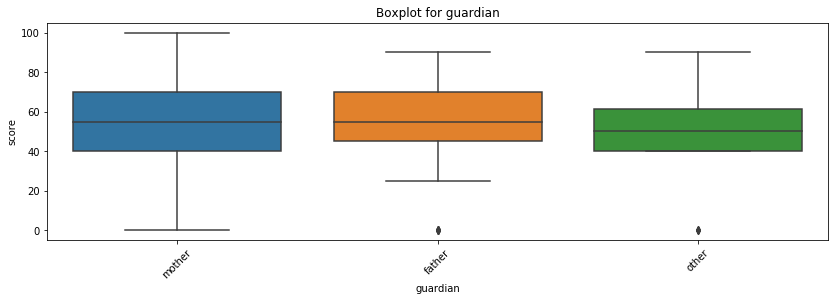

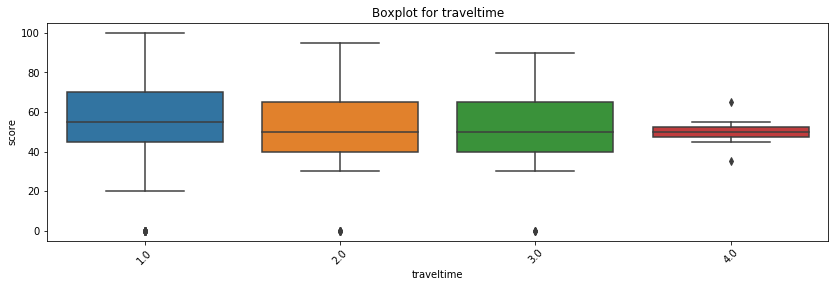

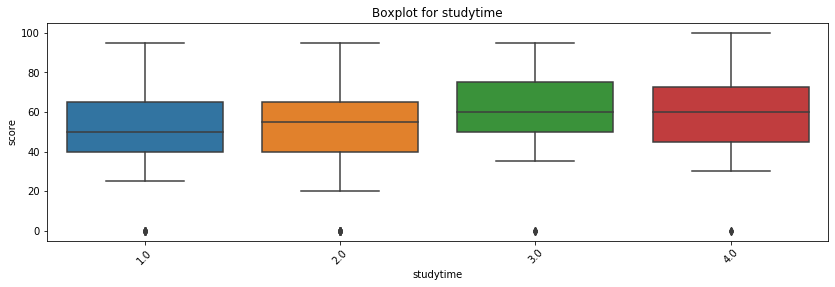

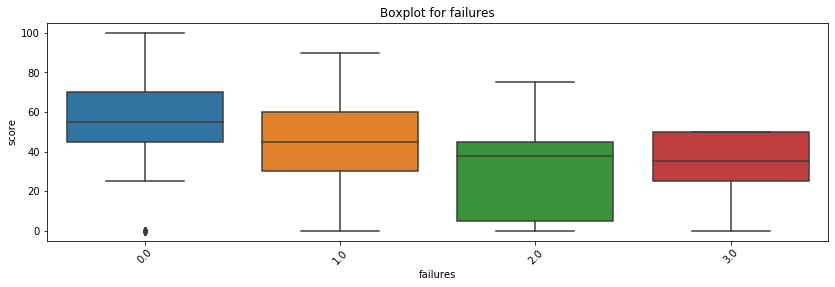

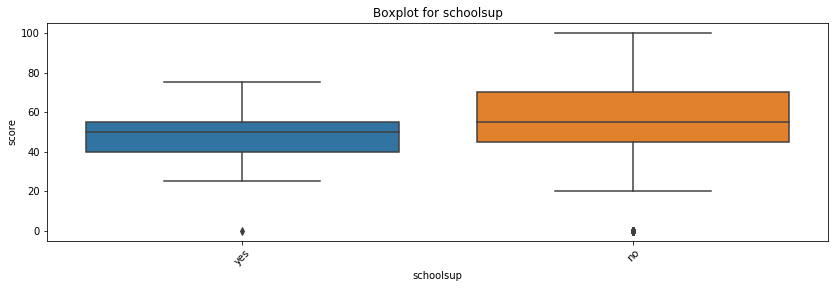

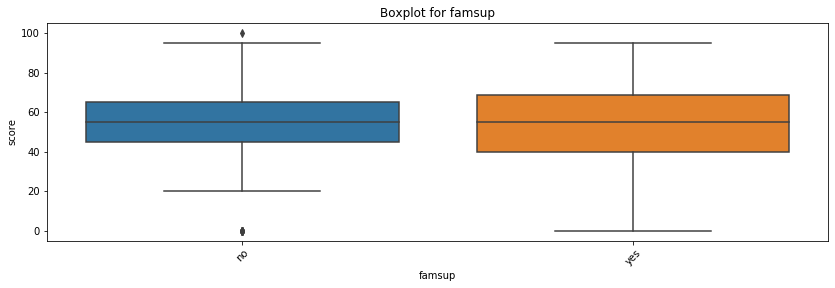

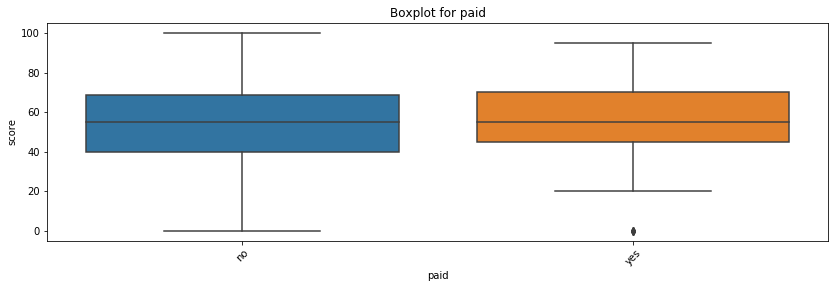

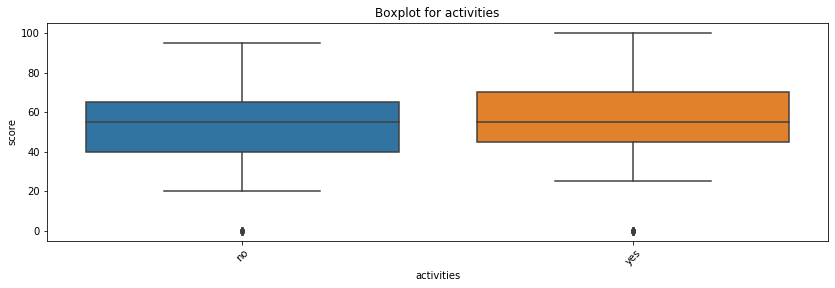

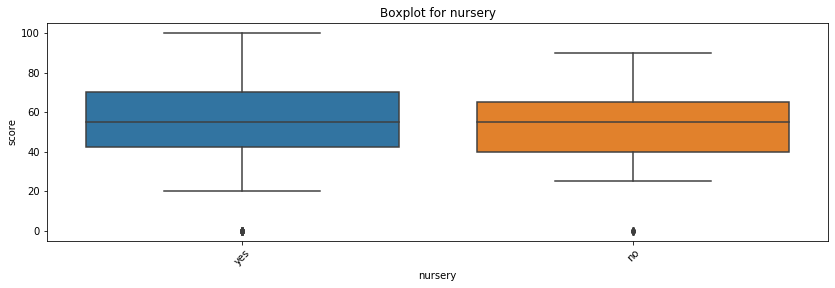

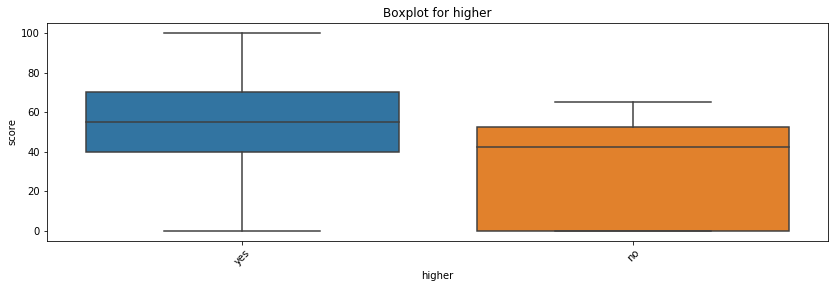

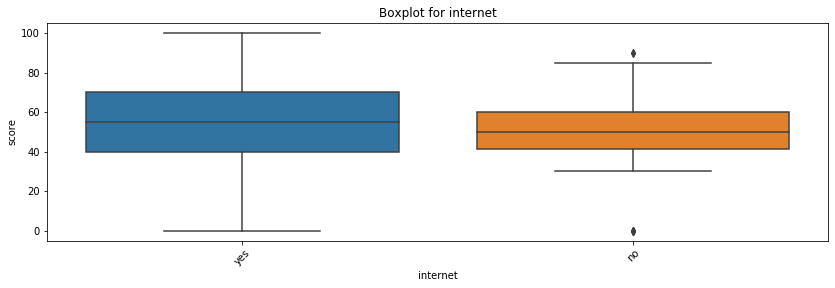

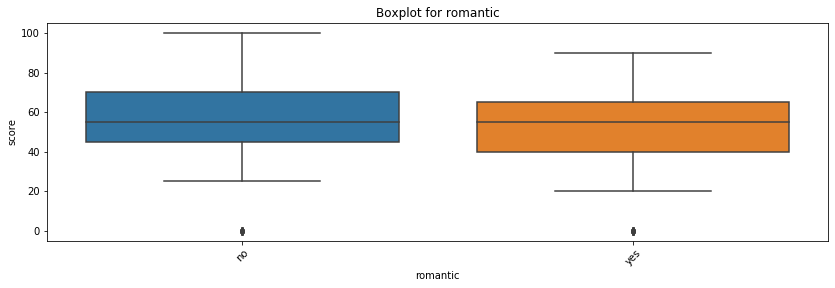

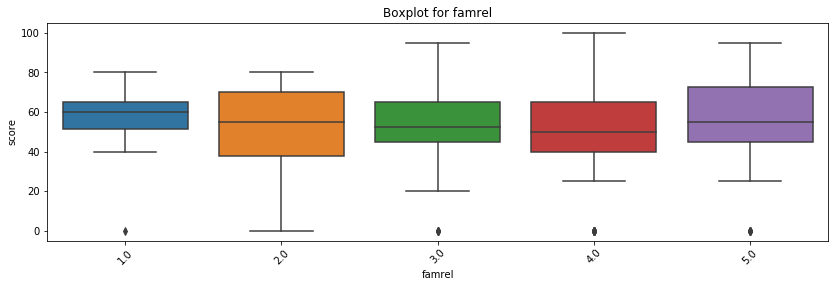

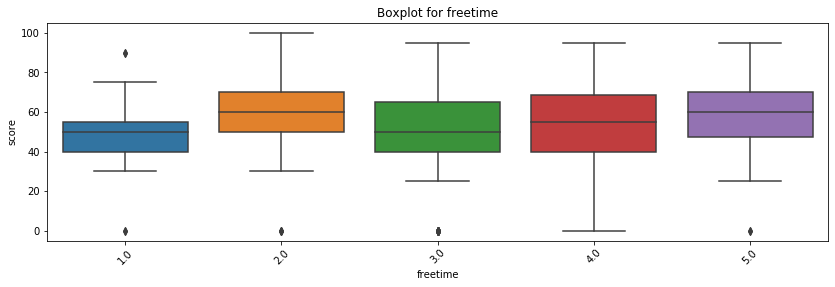

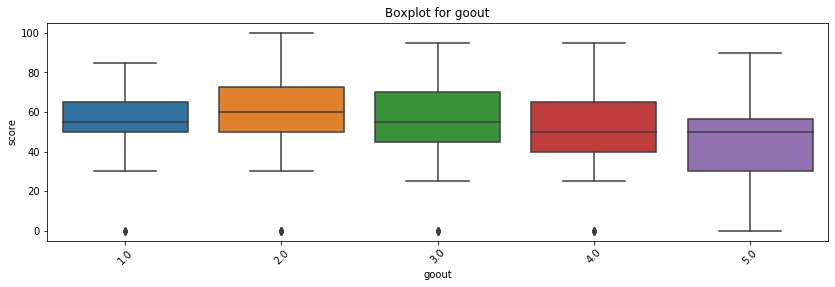

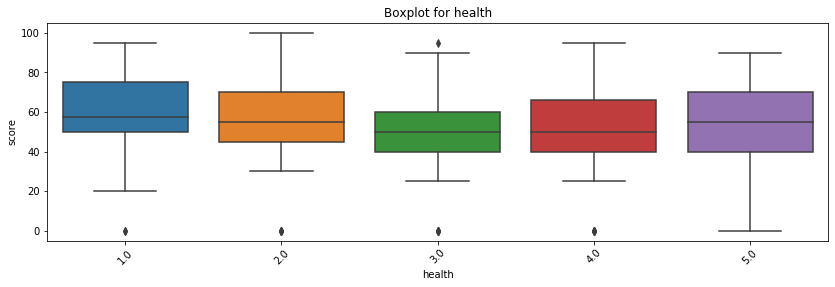

In [323]:
list_nom = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                      'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                      'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                      'higher', 'internet', 'romantic', 'famrel',
                      'freetime', 'goout', 'health']


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in list_nom:
    get_boxplot(col)

Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:

In [363]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for i in list_nom:
    get_stat_dif(i)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Как мы видим, серьёзно отличаются восемь параметров/ Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: sex,address,Medu,Mjob,failures,higher,romantic,goout.

In [364]:
stud_math_model = stud_math.loc[:, ['sex', 'address', 'Medu',
                                    'Mjob', 'failures', 'higher', 'romantic', 'goout', 'score']]
stud_math_model.head()

,sex,address,Medu,Mjob,failures,higher,romantic,goout,score
0,F,U,4.0,at_home,0.0,yes,no,4.0,30.0
1,F,U,1.0,at_home,0.0,yes,no,3.0,30.0
2,F,U,1.0,at_home,3.0,yes,NaN,2.0,50.0
3,F,U,4.0,health,0.0,yes,yes,2.0,75.0
4,F,U,3.0,other,0.0,yes,no,2.0,50.0


# 6. Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

Практически все поля содержат пустые значения. 
В столбце "количество пропущенных занятий" присутствуют выбросы, в столбцах Fedu и famrel тоже имеют место быть нетипичные значения. Однако их мало, что позволяет сделать вывод о том, что данные достаточно чистые.

Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex,address,Medu,Mjob,failures,higher,romantic,goout.